# Principle component analysis for dimensional reduction

In the following we introduce the concept of principle component analysis (PCA). The basic idea is to reduce the number of relevant features/columns of data, i.e., yield dimensionality reduction. To this end, the PCA produces so-called principle components which capture/represent in descending order the variance of the data. Basically, the co-variance matrix of the date is computed and diagonalized to reach this goal. For more information on PCA, we refer to https://en.wikipedia.org/wiki/Principal_component_analysis and for a discussion on the python implementation see https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60.

The data to be analyzed captures mobile phone user motion information and can be downloaded from: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/data.

In this notebook, we merely seek to discuss the python implementation and visualization of the result of the PCA.

In [1]:
#importing necessary packages

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#define data frame

df = pd.read_csv("./train.csv.bz2")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
df.shape

(7352, 563)

In [4]:
#define variables
X = df.drop("subject", axis = 1).drop("Activity", axis = 1) #drop two last columns
Y = df["Activity"]

In [5]:
X.shape

(7352, 561)

In [6]:
#need to rescale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
#proceed with PCA (reduce dimensions)
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #break down 561 columns/axes down to 2!
pca.fit(X)

X_transformed = pca.transform(X)

In [8]:
X_transformed.shape

(7352, 2)

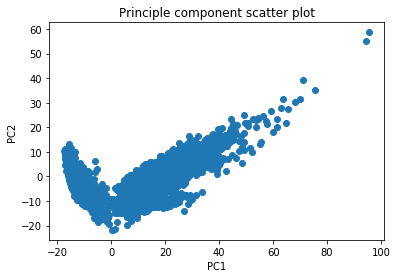

In [9]:
#visualize result of dimensional reduction 

plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principle component scatter plot')
plt.show()

In [10]:
#incorporate Y-information into the analysis
#would like to filter the above graphic and allow only those points where Y has the value "STANDING"

#Y.unique()
#Y == "STANDING"

#filtering
X_transformed_filtered = X_transformed[Y == "STANDING"]

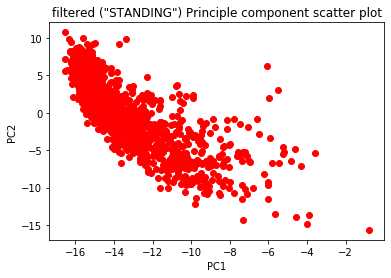

In [11]:
#visualize filtered result of dimensional reduction 

plt.scatter(X_transformed_filtered[:, 0], X_transformed_filtered[:, 1], color = 'r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('filtered ("STANDING") Principle component scatter plot')
plt.show()

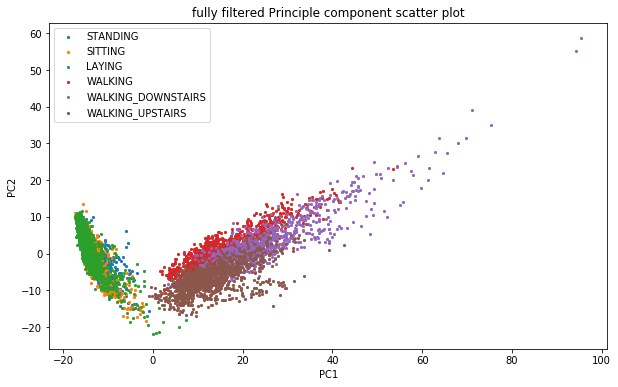

In [12]:
#visualize generalized filtering: all categories

plt.figure(figsize = (10, 6))

for activity in Y.unique():
    X_transformed_filtered = X_transformed[Y == activity]
    plt.scatter(X_transformed_filtered[:, 0], X_transformed_filtered[:, 1], label = activity, s = 4.5) 

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('fully filtered Principle component scatter plot')
plt.show()

We observe that the left cluster corresponds to resting probands while the right cluster represents probands in motion. Hence, the data broadly falls into two categories. The data thus is linearily separable.

In [13]:
#more detailed analysis: PCA leading to 3 PCs

pca = PCA(n_components = 3) #break down 561 columns/axes down to 2!
pca.fit(X)

X_transformed = pca.transform(X)
X_transformed.shape

(7352, 3)

<IPython.core.display.Javascript object>


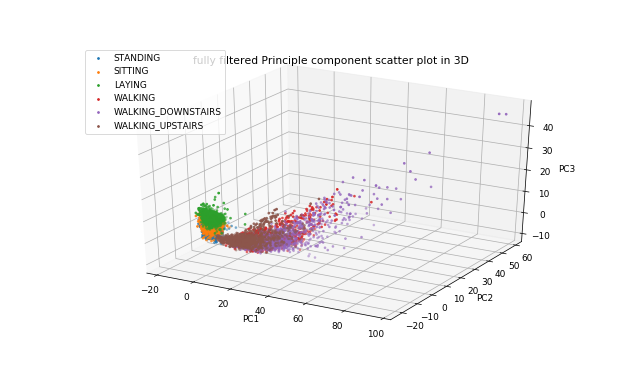

In [16]:
#visualize generalized filtering: all categories in 3D
%matplotlib notebook
#to rotate notebook #inline to get fixed plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')

for activity in Y.unique():
    X_transformed_filtered = X_transformed[Y == activity]
    ax.scatter(
        X_transformed_filtered[:, 0], #:integer to constrain the amount of transformed/plotted points
        X_transformed_filtered[:, 1], 
        X_transformed_filtered[:, 2], 
        label = activity, 
        s = 4
    )

plt.legend()

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('fully filtered Principle component scatter plot in 3D')
plt.show()  